In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import datetime
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from mpl_finance import candlestick_ohlc
import talib
import technical_trading_index as tti
%matplotlib inline

In [2]:
data = pd.read_pickle('./test/sma_2018.pkl')
index = pd.read_pickle('./data/visualization/data_with_visual_index.pkl')
date = [i for i in index.index if i[:4] in ['2018']][60:]
index = index.loc[date]

In [3]:
data.shape

(132771, 3)

In [4]:
index.shape

(132771, 26)

In [ ]:
plot_index.columns

/home/kwellyt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


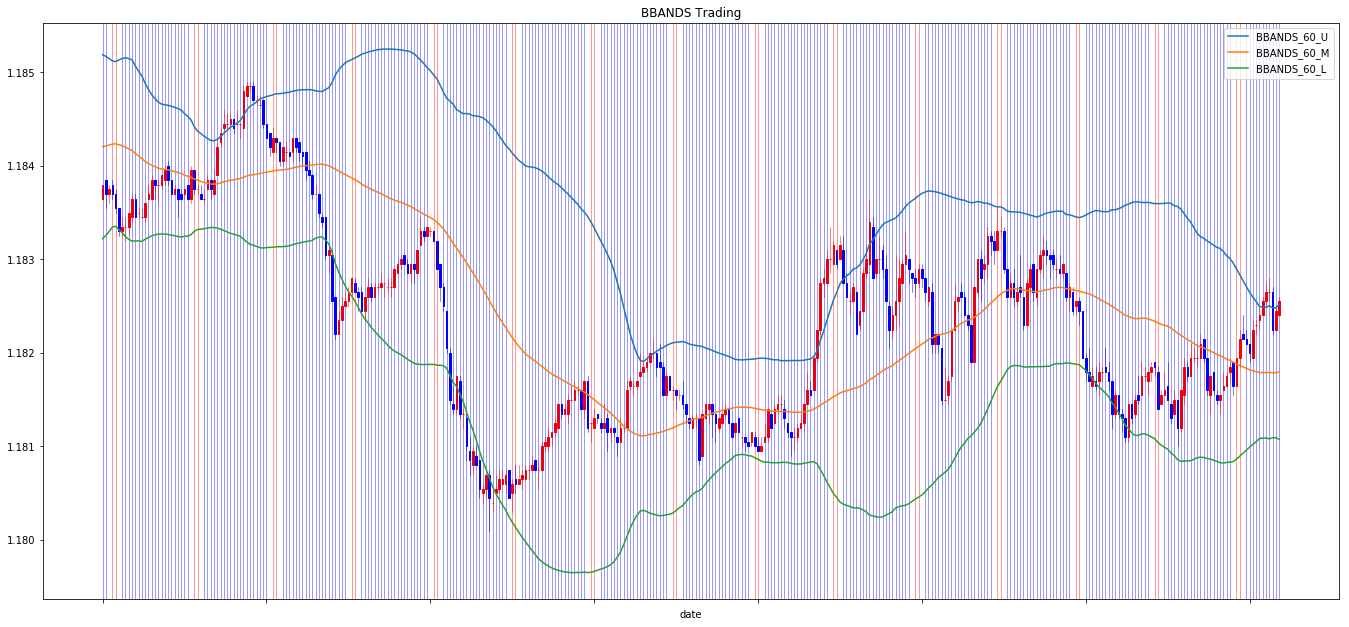

In [5]:
period = 360
start = np.random.choice(len(data) - period, size=1)[0]
plot_data = data.iloc[start:(start+period)]
plot_index = index.iloc[start:(start+period)]
plot_index['date'] = range(len(plot_index))

fig = plt.figure(frameon=False, figsize=(18, 8))
ax = fig.add_axes([0, 0, 1, 1])
for x, i in enumerate(plot_data.index):
    action = plot_data.loc[i, 'a']
    if action == 1:
        ax.axvline(x=x, color='red', alpha=0.8, linewidth=0.5)
    elif action == 2:
        ax.axvline(x=x, color='blue', alpha=0.8, linewidth=0.5)
        
q = plot_index[['date', 'open', 'high', 'low', 'close']]
candlestick_ohlc(ax, q.values, width=0.5, colorup='r', colordown='b')
plot_index[['BBANDS_60_U', 'BBANDS_60_M', 'BBANDS_60_L']].plot(ax=ax, linewidth=1.5)
plt.title('BBANDS Trading')
plt.show()

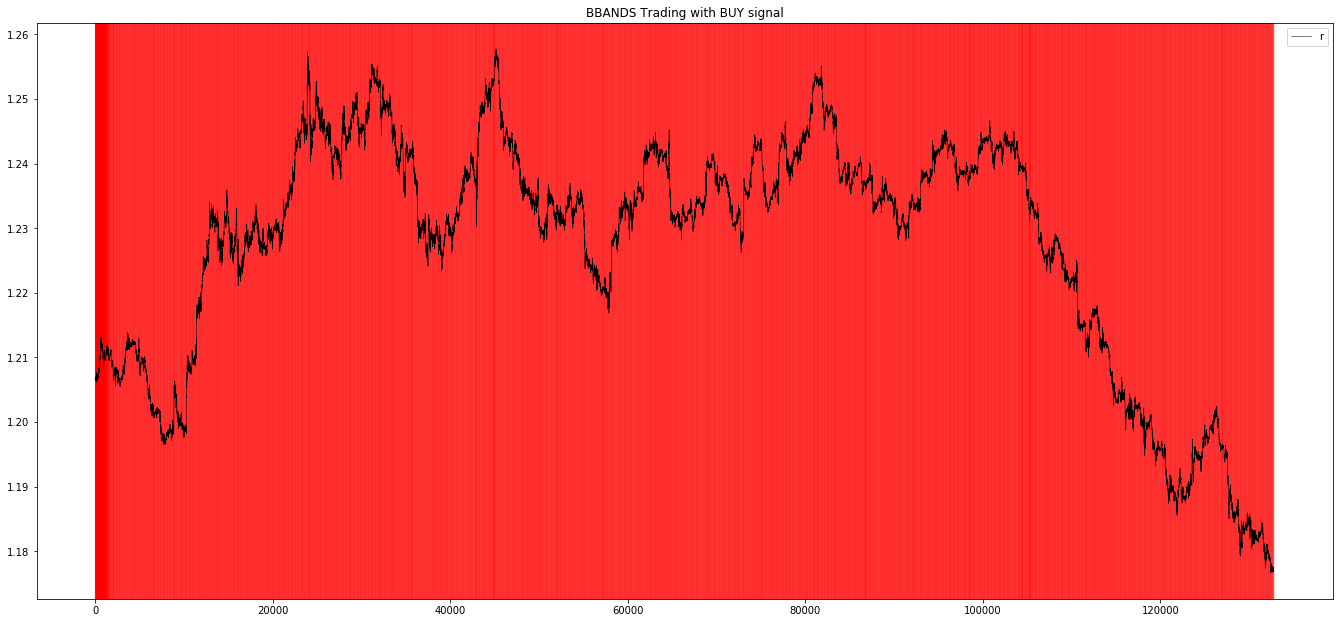

In [6]:
fig = plt.figure(frameon=False, figsize=(18, 8), )
ax = fig.add_axes([0, 0, 1, 1])
for i in data.index:
    action = data.loc[i, 'a']
    if action == 1:
        ax.axvline(x=i, color='red', alpha=0.8, linewidth=0.2)
data[['r']].plot(ax=ax, linewidth=0.5, color='black')
plt.title('BBANDS Trading with BUY signal')
plt.show()

In [ ]:
fig = plt.figure(frameon=False, figsize=(18, 8))
ax = fig.add_axes([0, 0, 1, 1])
for i in data.index:
    action = data.loc[i, 'a']
    if action == 2:
        ax.axvline(x=i, color='blue', alpha=0.8, linewidth=0.2)
data[['r']].plot(ax=ax, linewidth=0.5, color='black')
plt.title('BBANDS Trading with SELL signal')

plt.show()

In [ ]:
data['Trader'] = data['p']
data['B&H'] = data['r'].map(lambda x: (x - data.loc[0, 'r']) / data.loc[0, 'r'])
fig = plt.figure(figsize=(18, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axhline(y=0, color='black')
data[['Trader', 'B&H']].plot(ax=ax, linewidth=1.5)
ax.grid(color='60', linestyle='--', linewidth=1)
plt.title('BBANDS Trading')
plt.xlabel('timestep', size=12)
plt.ylabel('profit', size=12)
plt.show()

In [ ]:
# SMA
fig = plt.figure(frameon=False, figsize=(18, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.autoscale(axis='x', tight=True)
ax.set_ylim((minimum, maximum))
q = data[['date', 'open', 'high', 'low', 'close']]
candlestick_ohlc(ax, q.values, width=0.2, colorup='r', colordown='b')
var = ['SMA_5', 'SMA_10', 'SMA_20', 'SMA_60']
data[var].plot(ax=ax)
plt.show()

In [ ]:
# BBANDS
fig = plt.figure(frameon=False, figsize=(18, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
q = data[['date', 'open', 'high', 'low', 'close']]
candlestick_ohlc(ax, q.values, width=0.2, colorup='r', colordown='b')

var = ['BBANDS_60_U', 'BBANDS_60_M', 'BBANDS_60_L']
data[var].plot(ax=ax)
plt.show()

In [ ]:
# MACD
fig = plt.figure(frameon=False, figsize=(18, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
data[['MACD', 'MACD_SIGNAL']].plot(ax=ax)
if sum(data['MACD_HIST'] > 0) != 0:
    plus_macd = data.loc[data['MACD_HIST'] > 0, 'MACD_HIST']
    plus_macd = plus_macd[data.index]
    plus_macd = plus_macd.fillna(0)
    ax.bar(x=data.index, height=plus_macd, color = 'r')
if sum(data['MACD_HIST'] < 0) != 0:
    minus_macd = data.loc[data['MACD_HIST'] < 0, 'MACD_HIST']
    minus_macd = minus_macd[data.index]
    minus_macd = minus_macd.fillna(0)
    ax.bar(x=data.index, height=minus_macd, color = 'b')
plt.show()

In [ ]:
#RSI
fig = plt.figure(frameon=False, figsize=(18, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.hlines(70, 0, 180)
plt.hlines(50, 0, 180)
plt.hlines(30, 0, 180)
var = ['RSI_9', 'RSI_14']
data[var].plot(ax=ax)
plt.show()

In [ ]:
# Stochastics slow
fig = plt.figure(frameon=False, figsize=(18, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.hlines(80, 0, 180)
plt.hlines(20, 0, 180)
var = ["STOCH_K", "STOCH_D"]
data[var].plot(ax=ax)
plt.show()

In [ ]:
# CCI
fig = plt.figure(frameon=False, figsize=(18, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.hlines(100, 0, 180)
plt.hlines(0, 0, 180)
plt.hlines(-100, 0, 180)
var = ["CCI"]
data[var].plot(ax=ax)
plt.show()

In [ ]:
# DMI
fig = plt.figure(frameon=False, figsize=(18, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
var = ["ADX", 'MINUS_DI', 'PLUS_DI']
data[var].plot(ax=ax)
plt.show()

In [ ]:
# SAR
fig = plt.figure(frameon=False, figsize=(18, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
q = data[['date', 'open', 'high', 'low', 'close']]
candlestick_ohlc(ax, q.values, width=0.2, colorup='r', colordown='b')
data.plot.scatter(x='date', y='SAR', ax=ax, legend=False, c='g')
plt.show()